In [1]:
# Standard useful data processing imports
import random
import numpy as np
import pandas as pd

# Visualisation imports
import matplotlib.pyplot as plt

# Scikit learn for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Keras Imports - CNN
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
# Kaggle Terminal path, use your own local path

import os
os.chdir("../input")

In [3]:
# Import data
# Dataset can be downloaded from https://www.kaggle.com/rishianand/devanagari-character-set
data = pd.read_csv("../input/data.csv")

In [4]:
# Print the first 6 rows

data.head(6)

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [5]:
# Grouping different character by their respective pixel distribution.
data.groupby("character").count()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
character,,,,,,,,,,,,,,,,,,,,,
character_01_ka,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_02_kha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_03_ga,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_04_gha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_05_kna,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_06_cha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_07_chha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_08_ja,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_09_jha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000


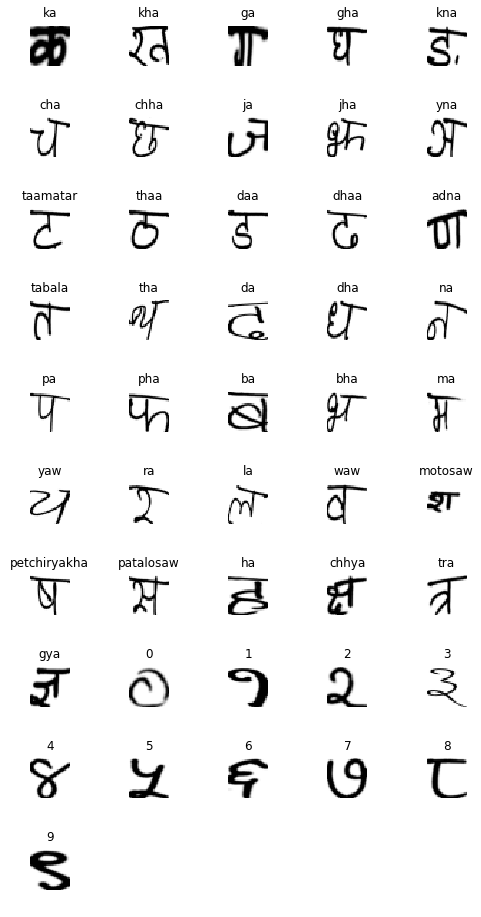

In [6]:
# Plot the different characters according to pixel distribution.
char_names = data.character.unique()
rows = 10; columns = 5;
fig, axis = plt.subplots(rows, columns, figsize = (8,16))
for row in range(rows):
    for col in range(columns):
        axis[row,col].set_axis_off()
        if columns*row+col < len(char_names):
            x = data[data.character==char_names[columns*row+col]].iloc[0,:-1].values.reshape(32,32)
            x = x.astype("float64")
            x/=255
            axis[row,col].imshow(x, cmap="binary")
            axis[row,col].set_title(char_names[columns*row+col].split("_")[-1])
            
plt.subplots_adjust(wspace=1, hspace=1)
plt.show()


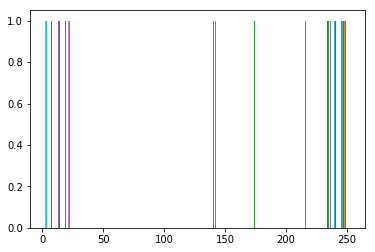

In [7]:
#Verifying the pixel distribution of any random character

plt.hist(data.iloc[0,:-1], histtype='bar')
plt.show()

In [8]:
#Splitting the dependent and independent values into two datasets
X = data.values[:,:-1]/255.0
y = data["character"].values

In [9]:
#Let us minimize the memory consumption
del data
n_classes = 46

In [10]:
# Let's split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the categories
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [11]:
img_height_rows = 32
img_width_cols = 32
im_shape = (img_height_rows, img_width_cols, 1)
X_train = X_train.reshape(X_train.shape[0], *im_shape) # The * operator unpacks the tuple
X_test = X_test.reshape(X_test.shape[0], *im_shape)

In [12]:
#CNN Model - Sequential Modelling
cnn = Sequential()

In [13]:
kernelSize = (3,3)
ip_activation = 'relu'
ip_conv_0 = Conv2D(filters=32, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation)
cnn.add(ip_conv_0)

In [14]:
# Add the next Convolutional and Activation layer
# ip-input, op-output
ip_conv_0_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_0_1)

# Add the Pooling layer
pool_0 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_0)

In [15]:
ip_conv_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1)
ip_conv_1_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1_1)

pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_1)

In [16]:
# Let's deactivate around 20% of neurons randomly for training
drop_layer_0 = Dropout(0.2)
cnn.add(drop_layer_0)

In [17]:
flat_layer_0 = Flatten()
cnn.add(Flatten())

In [18]:
# Now add the Dense layers
h_dense_0 = Dense(units=128, activation=ip_activation, kernel_initializer='uniform')
cnn.add(h_dense_0)
# Let's add one more before proceeding to the output layer
h_dense_1 = Dense(units=64, activation=ip_activation, kernel_initializer='uniform')
cnn.add(h_dense_1)

In [19]:
op_activation = 'softmax'
output_layer = Dense(units=n_classes, activation=op_activation, kernel_initializer='uniform')
cnn.add(output_layer)

In [20]:
opt = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
# Compile the classifier using the configuration we want
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)

In [21]:
print(cnn.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)         

In [22]:
history = cnn.fit(x_train, y_train,
                  batch_size=200, epochs=50,
                  validation_data=(x_test, y_test))

Train on 73600 samples, validate on 18400 samples
Epoch 1/50
73600/73600 [==============================] - 23s 311us/step - loss: 1.0541 - accuracy: 0.7041 - val_loss: 0.3198 - val_accuracy: 0.8998
Epoch 2/50
73600/73600 [==============================] - 18s 251us/step - loss: 0.2729 - accuracy: 0.9147 - val_loss: 0.1980 - val_accuracy: 0.9397
Epoch 3/50
73600/73600 [==============================] - 18s 250us/step - loss: 0.1741 - accuracy: 0.9454 - val_loss: 0.1359 - val_accuracy: 0.9575
Epoch 4/50
73600/73600 [==============================] - 19s 258us/step - loss: 0.1263 - accuracy: 0.9595 - val_loss: 0.1368 - val_accuracy: 0.9590
Epoch 5/50
73600/73600 [==============================] - 18s 250us/step - loss: 0.1004 - accuracy: 0.9681 - val_loss: 0.1269 - val_accuracy: 0.9627
Epoch 6/50
73600/73600 [==============================] - 18s 251us/step - loss: 0.0774 - accuracy: 0.9754 - val_loss: 0.0950 - val_accuracy: 0.9720
Epoch 7/50
73600/73600 [==============================] 

In [23]:
scores = cnn.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.67%


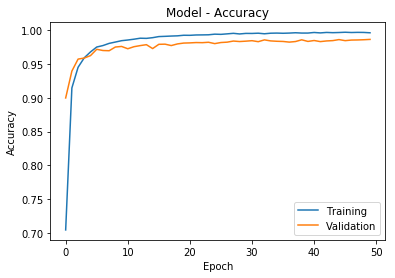

In [24]:
# Accuracy
print(history)
fig1, ax_acc = plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

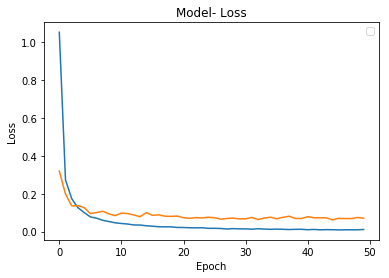

In [25]:
# Loss
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()